In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error

In [28]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [29]:
sales_c= df.drop(['Product Name','Product Category','Month','Year','Market Size','Month No.', 'Marketing Expense'],axis=1)

In [30]:
sales_c.shape

(60, 1)

In [31]:
sales_c.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2019-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sales   60 non-null     int64
dtypes: int64(1)
memory usage: 960.0 bytes


In [32]:
sales_c['Sales'].sum()

45599092

Text(0.5, 1.0, 'Product C')

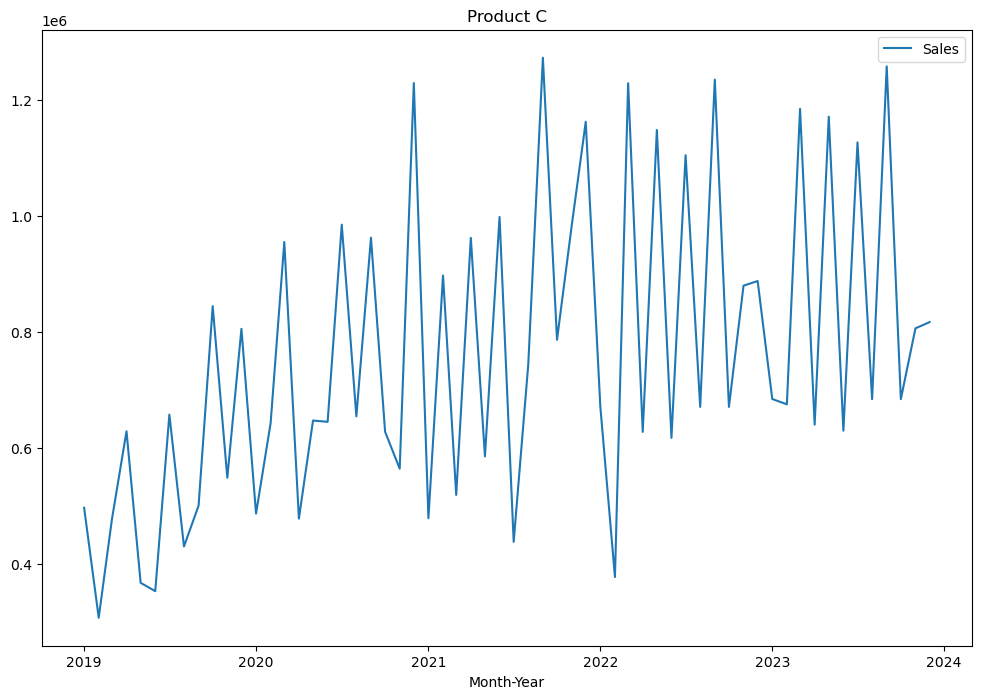

In [33]:
plt.figure(figsize=(12,8))
sns.lineplot(sales_c)
plt.title('Product C')

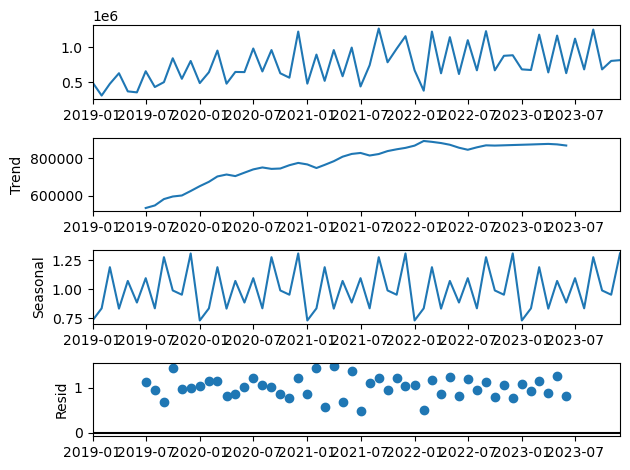

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
decomposition = seasonal_decompose(sales_c, model='multiplicative', period=12)

# Plot the decomposition
fig = decomposition.plot()
plt.show()


In [35]:
train= sales_c[:48]
test=sales_c[48:]

In [36]:
len(train)

48

In [37]:
model=ExponentialSmoothing(train,trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Maaz\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [38]:
pred=model.forecast(12)

In [39]:
pred

2023-01-01    6.252232e+05
2023-02-01    7.511835e+05
2023-03-01    9.985096e+05
2023-04-01    7.612895e+05
2023-05-01    8.635292e+05
2023-06-01    8.246487e+05
2023-07-01    9.013710e+05
2023-08-01    7.497286e+05
2023-09-01    1.080976e+06
2023-10-01    9.336515e+05
2023-11-01    8.204809e+05
2023-12-01    1.236863e+06
Freq: MS, dtype: float64

Text(0.5, 1.0, 'Product C')

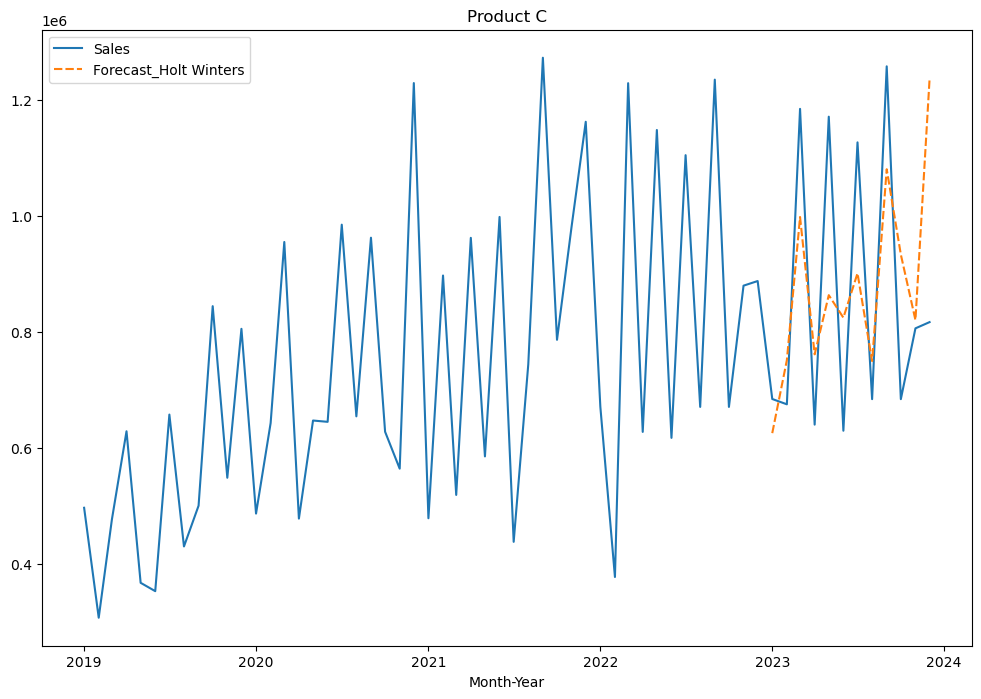

In [40]:
sales_c['Forecast_Holt Winters']=[None]*len(train) + list(pred)
plt.figure(figsize=(12,8))
sns.lineplot(sales_c)
plt.title('Product C')

In [41]:
mae= mean_absolute_error(test,pred)
mse=mean_squared_error(test, pred)
mape= mean_absolute_percentage_error(test,pred)
rmse= np.sqrt(mean_squared_error(test, pred))
rmspe = np.sqrt(np.mean(((test - pred) / test) ** 2)) * 100

print(f'MAE - Holt Winters: {mae}')
print(f'MAPE - Holt Winters: {mape}')
print(f'MSE - Holt Winters: {mse}')
print(f'RMSE - Holt Winters: {rmse}')
print(f'RMSPE - Holt Winters:: {rmspe}')

MAE - Holt Winters: 175011.14635404502
MAPE - Holt Winters: 0.20450900547533482
MSE - Holt Winters: 43157325494.559105
RMSE - Holt Winters: 207743.41263818476
RMSPE - Holt Winters:: 2023-01-01 00:00:00   NaN
2023-02-01 00:00:00   NaN
2023-03-01 00:00:00   NaN
2023-04-01 00:00:00   NaN
2023-05-01 00:00:00   NaN
2023-06-01 00:00:00   NaN
2023-07-01 00:00:00   NaN
2023-08-01 00:00:00   NaN
2023-09-01 00:00:00   NaN
2023-10-01 00:00:00   NaN
2023-11-01 00:00:00   NaN
2023-12-01 00:00:00   NaN
Sales                 NaN
dtype: float64


C:\Users\Maaz\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
